<a href="https://colab.research.google.com/github/bondarenko77/IAD_PR/blob/main/%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%91%D0%BE%D0%BD%D0%B4%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%AF%D0%BD%D0%B0_LAb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


Завантажуємо датасет

In [ ]:
from google.colab import files
uploaded = files.upload()  # heart+disease.zip

import zipfile
import os

zip_path = list(uploaded.keys())[0]  # ім'я файлу
extract_to = "/content/heart_disease_unzipped"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Файли:", os.listdir(extract_to))



Saving heart+disease.zip to heart+disease (1).zip
Файли: ['new.data', 'processed.switzerland.data', 'hungarian.data', 'cleveland.data', 'long-beach-va.data', 'processed.cleveland.data', 'ask-detrano', 'processed.va.data', 'bak', 'WARNING', 'switzerland.data', 'costs', 'Index', 'cleve.mod', 'reprocessed.hungarian.data', 'heart-disease.names', 'processed.hungarian.data']


Завантаження даних та виведення базової інформації

In [ ]:
import pandas as pd

# Вибираємо файл для аналізу (processed.cleveland.data)
data_file = os.path.join(extract_to, "processed.cleveland.data")

# Назви колонок
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Завантажуємо датасет у DataFrame
df = pd.read_csv(data_file, header=None, names=columns, na_values="?")

# Перевіряємо розмір та перші рядки
print("Розмір датасету:", df.shape)
df.head()


Розмір датасету: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Опрацювання пропусків


In [ ]:
# Перевіряємо кількість пропусків у кожній колонці
print("Пропуски у колонках:\n", df.isnull().sum())

# Видаляємо рядки з пропусками
df_clean = df.dropna()
print("Розмір після видалення пропусків:", df_clean.shape)


Пропуски у колонках:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Розмір після видалення пропусків: (297, 14)


Візуалізація даних

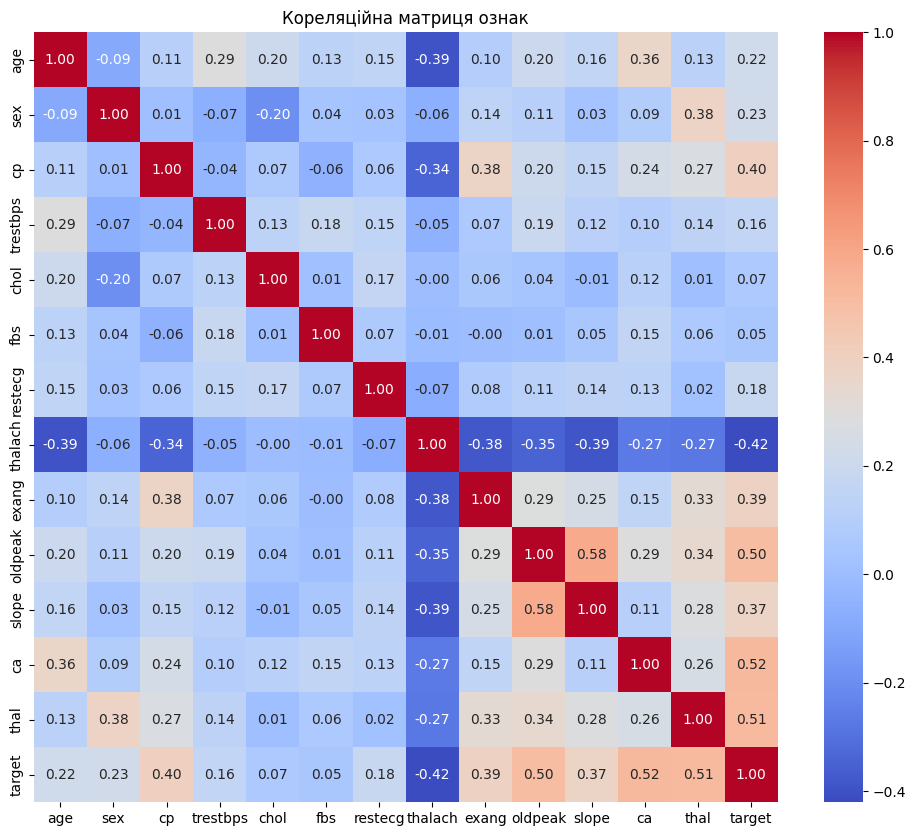

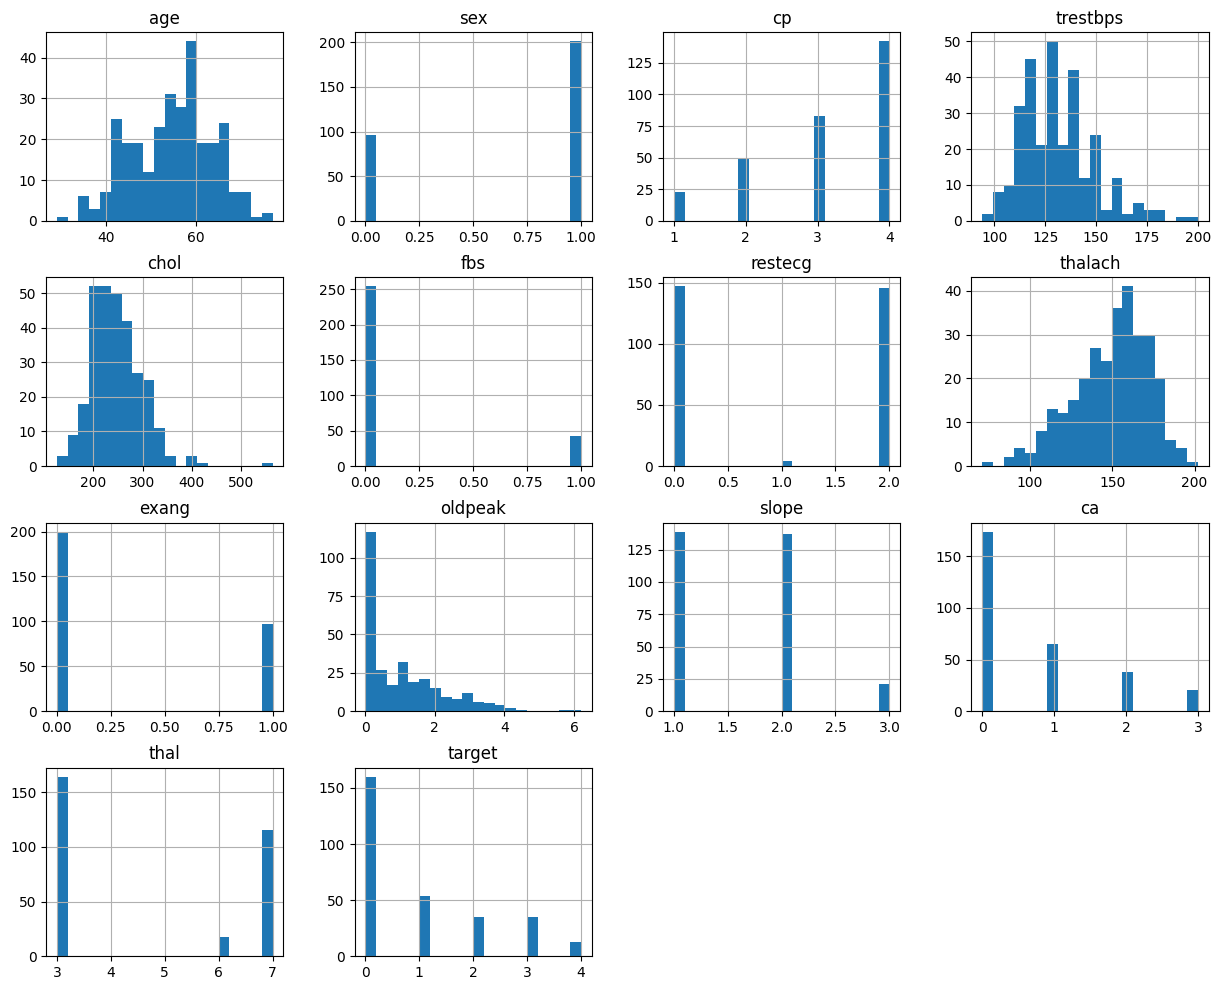

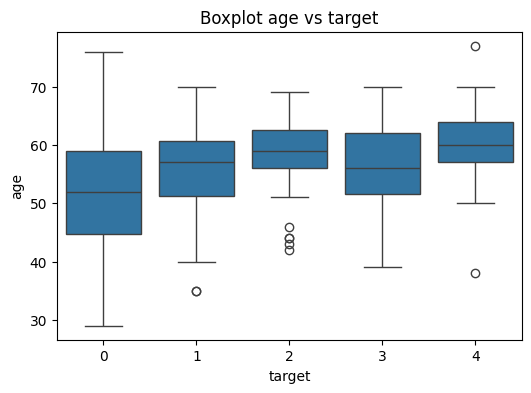

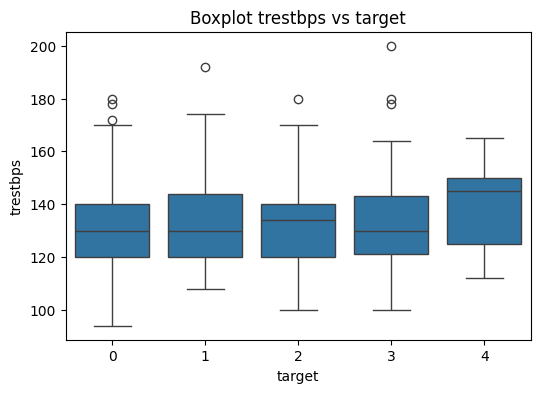

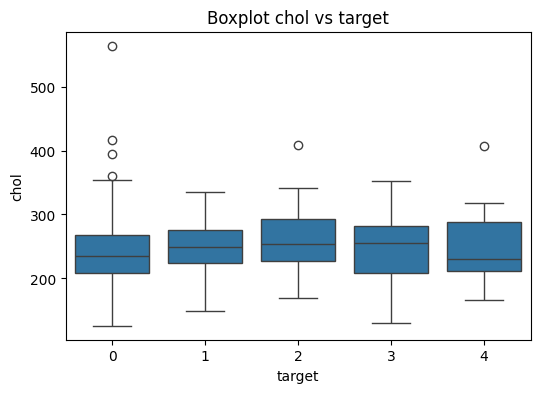

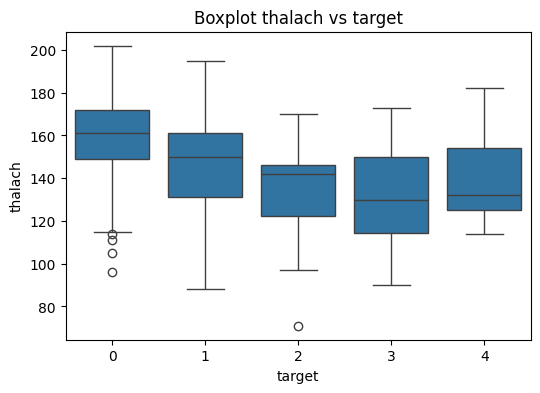

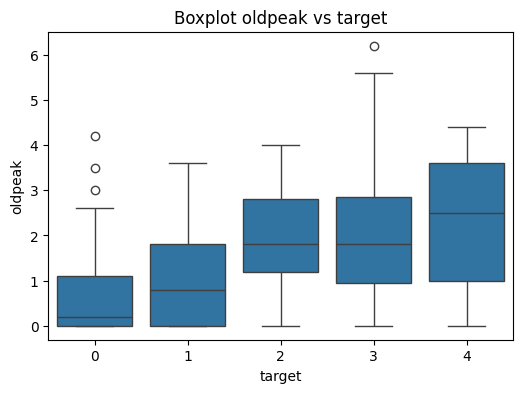

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Кореляційна матриця
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця ознак")
plt.show()

# 2) Гістограми розподілу всіх ознак
df_clean.hist(figsize=(15,12), bins=20)
plt.show()

# 3) Boxplot декількох ознак відносно цільової змінної
cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df_clean)
    plt.title(f"Boxplot {col} vs target")
    plt.show()


Нормалізація даних


In [ ]:
from sklearn.preprocessing import StandardScaler

# Відокремлюємо ознаки та цільову змінну
features = df_clean.drop("target", axis=1)
target = df_clean["target"]

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


Розбивка на навчальну та тестову вибірки

In [ ]:
from sklearn.model_selection import train_test_split

# Розбивка на train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)


Навчання класифікаторів та підбір параметрів

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# 1) kNN
param_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# 2) SVM
param_svm = {'C':[0.1,1,10,100], 'gamma':[0.01,0.1,1,10]}
grid_svm = GridSearchCV(SVC(), param_svm, cv=5)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# 3) Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 4) Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 5) AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

Оцінка моделей

=== kNN ===
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



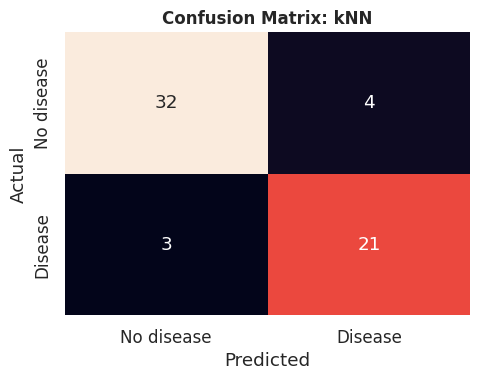

=== SVM ===
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.91      0.88      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



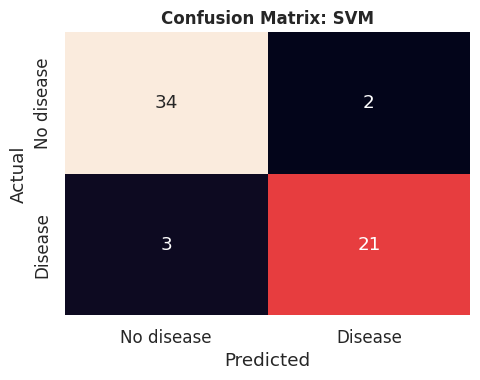

=== Decision Tree ===
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



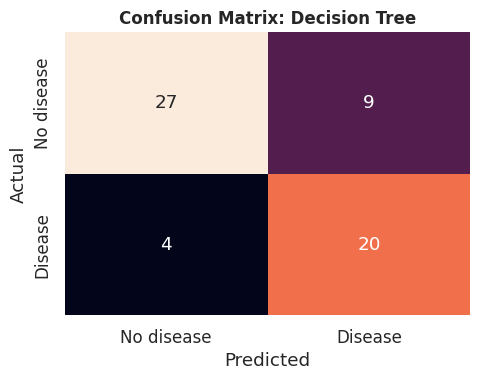

=== Random Forest ===
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



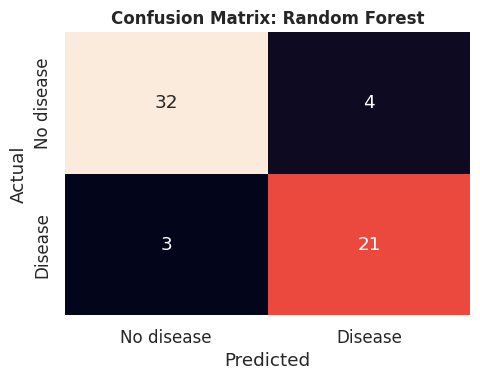

=== AdaBoost ===
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



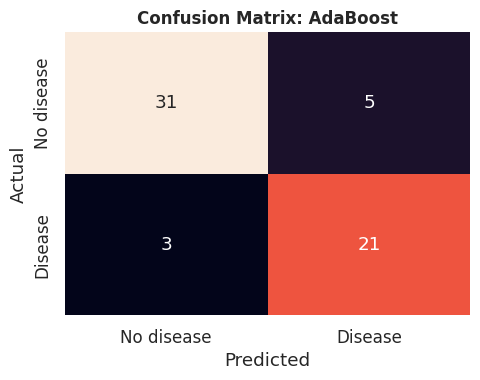

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "kNN": best_knn,
    "SVM": best_svm,
    "Decision Tree": tree,
    "Random Forest": rf,
    "AdaBoost": ab
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"=== {name} ===")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # --- Confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='rocket', cbar=False,
        xticklabels=['No disease', 'Disease'],
        yticklabels=['No disease', 'Disease']
    )
    plt.title(f'Confusion Matrix: {name}', fontsize=12, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()


Щоб класифікація була коректною, ми внесемо дві зміни. По-перше, бінаризуємо цільову змінну: 0 — немає хвороби, 1 — є хвороба. Це допоможе моделям навчатися стабільно та давати осмислені метрики.

По-друге, нормалізуємо ознаки за допомогою StandardScaler, щоб усі показники були в одному масштабі і алгоритми, особливо kNN та SVM, працювали правильно.

Це забезпечить стабільне навчання та коректну оцінку моделей.

**⤵️ Блок 1. KNN**

 Best params (KNN): {'clf__n_neighbors': 13}
Accuracy: 0.883
F1-macro: 0.879
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



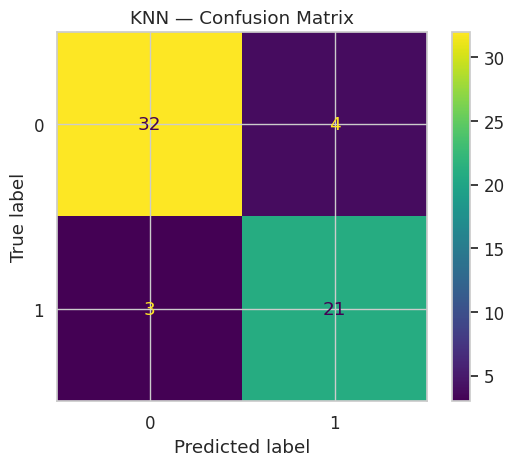

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tempfile import mkdtemp
import shutil

# --- Кеш для прискорення
cache_dir = mkdtemp()

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
], memory=cache_dir)

param_knn = {'clf__n_neighbors': range(1, 21)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_knn,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred = best_knn.predict(X_test)

print(" Best params (KNN):", grid_knn.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-macro: {f1_score(y_test, y_pred, average='macro'):.3f}")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("KNN — Confusion Matrix")
plt.show()

shutil.rmtree(cache_dir, ignore_errors=True)


**⤵️ Блок 2. SVM**

 Best params (SVM): {'clf__C': 1, 'clf__gamma': 0.01}
Accuracy: 0.917
F1-macro: 0.913
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.91      0.88      0.89        24

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



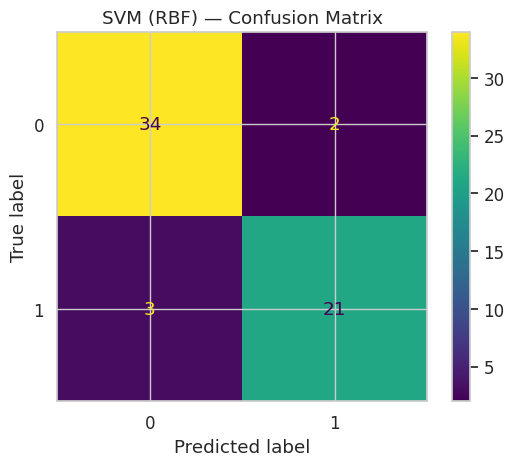

In [ ]:
from sklearn.svm import SVC

cache_dir = mkdtemp()

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', random_state=42))
], memory=cache_dir)

param_svm = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_svm,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

y_pred = best_svm.predict(X_test)

print(" Best params (SVM):", grid_svm.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-macro: {f1_score(y_test, y_pred, average='macro'):.3f}")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("SVM (RBF) — Confusion Matrix")
plt.show()

shutil.rmtree(cache_dir, ignore_errors=True)


**⤵️ Блок 3. Decision Tree + Random Forest**

 Decision Tree
Accuracy: 0.783
F1-macro: 0.780
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60



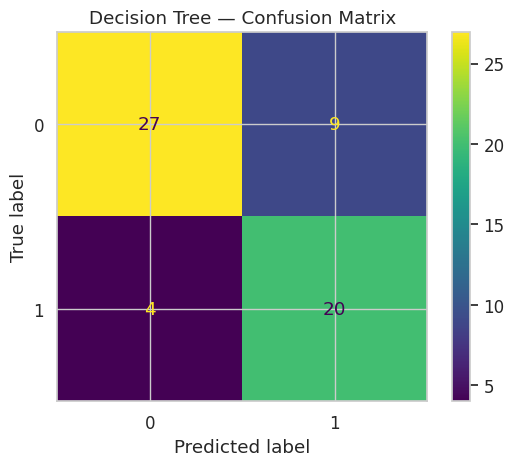

 Random Forest
Accuracy: 0.883
F1-macro: 0.879
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



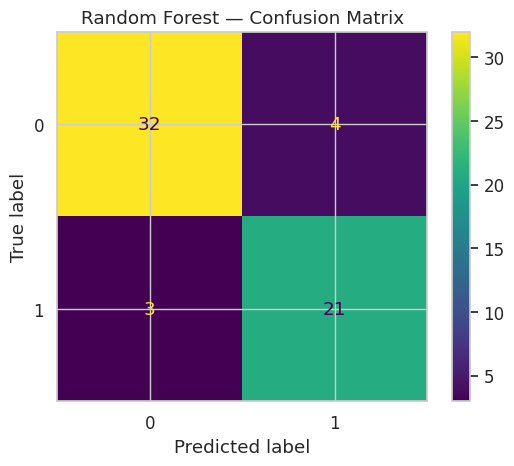

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
tree = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(" Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}")
print(f"F1-macro: {f1_score(y_test, y_pred_tree, average='macro'):.3f}")
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Decision Tree — Confusion Matrix")
plt.show()

# Random Forest
rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"F1-macro: {f1_score(y_test, y_pred_rf, average='macro'):.3f}")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest — Confusion Matrix")
plt.show()


**⤵️ Блок 4. AdaBoost**

⚡ AdaBoost
Accuracy: 0.867
F1-macro: 0.863
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



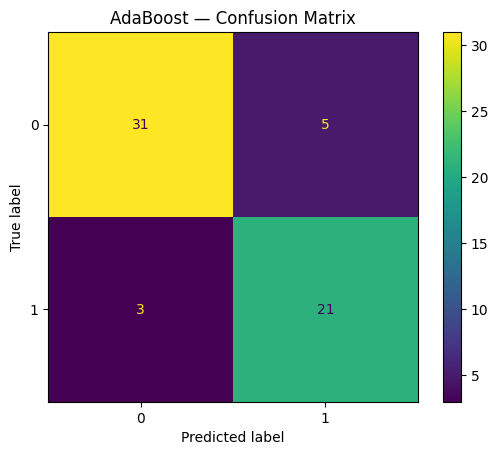

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier(random_state=42))
])
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

print("⚡ AdaBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ab):.3f}")
print(f"F1-macro: {f1_score(y_test, y_pred_ab, average='macro'):.3f}")
print(classification_report(y_test, y_pred_ab))

ConfusionMatrixDisplay.from_estimator(ab, X_test, y_test)
plt.title("AdaBoost — Confusion Matrix")
plt.show()


Порівняльна таблиця результатів

-> Порівняльна таблиця результатів:


,Model,Accuracy,F1-macro,Average
0,KNN,0.883,0.879,0.881
1,SVM,0.917,0.913,0.915
2,Decision Tree,0.783,0.780,0.782
3,Random Forest,0.883,0.879,0.881
4,AdaBoost,0.867,0.863,0.865



-> Найкраща модель: SVM (Accuracy=0.917, F1=0.913)


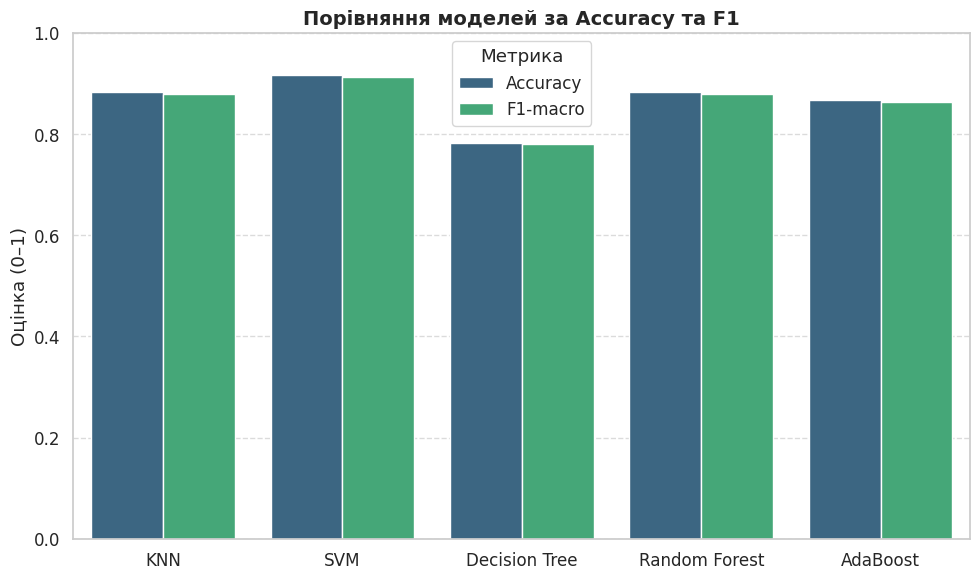

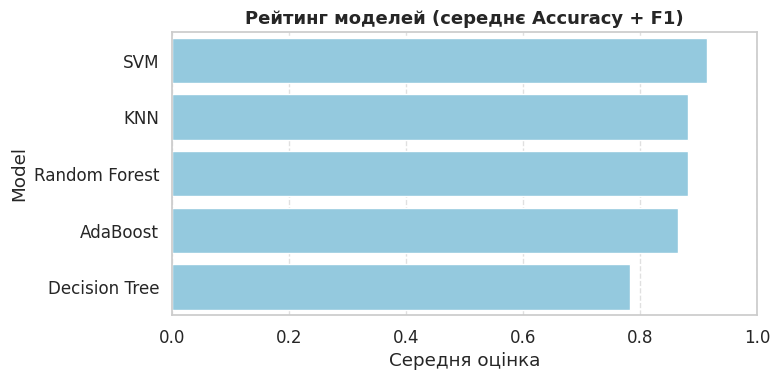

In [ ]:
# Фінальний блок: порівняння моделей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# --- Розрахунок метрик ---
results = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost'],
    'Accuracy': [
        accuracy_score(y_test, best_knn.predict(X_test)),
        accuracy_score(y_test, best_svm.predict(X_test)),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ab)
    ],
    'F1-macro': [
        f1_score(y_test, best_knn.predict(X_test), average='macro'),
        f1_score(y_test, best_svm.predict(X_test), average='macro'),
        f1_score(y_test, y_pred_tree, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_ab, average='macro')
    ]
})

# --- Гарантуємо, що всі значення числові ---
results['Accuracy'] = pd.to_numeric(results['Accuracy'], errors='coerce')
results['F1-macro'] = pd.to_numeric(results['F1-macro'], errors='coerce')
results['Average'] = results[['Accuracy', 'F1-macro']].mean(axis=1)

# --- Визначаємо найкращу модель ---
best_model = results.loc[results['Average'].idxmax()]

print("-> Порівняльна таблиця результатів:")
display(results.style.background_gradient(cmap='Greens').format({
    'Accuracy': '{:.3f}',
    'F1-macro': '{:.3f}',
    'Average': '{:.3f}'
}))

print(f"\n-> Найкраща модель: {best_model['Model']} "
      f"(Accuracy={best_model['Accuracy']:.3f}, F1={best_model['F1-macro']:.3f})")

# --- Встановлення стилю ---
sns.set(style="whitegrid", font_scale=1.1)

# --- 1 -> Графік: порівняння Accuracy та F1 ---
plt.figure(figsize=(10, 6))
results_melted = results.melt(id_vars='Model', value_vars=['Accuracy', 'F1-macro'])
sns.barplot(
    data=results_melted,
    x='Model', y='value', hue='variable', palette='viridis'
)

plt.title('Порівняння моделей за Accuracy та F1', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Оцінка (0–1)')
plt.ylim(0, 1)
plt.legend(title='Метрика')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2 -> Графік: рейтинг моделей ---
plt.figure(figsize=(8, 4))
sns.barplot(
    data=results.sort_values('Average', ascending=False),
    x='Average', y='Model', color='skyblue'  # заменили palette на color, предупреждение исчезнет
)
plt.title('Рейтинг моделей (середнє Accuracy + F1)', fontsize=13, fontweight='bold')
plt.xlabel('Середня оцінка')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
